/tmp/ipykernel_42149/786232413.py:5: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  data = np.loadtxt('gradient.txt', dtype=np.uint8)


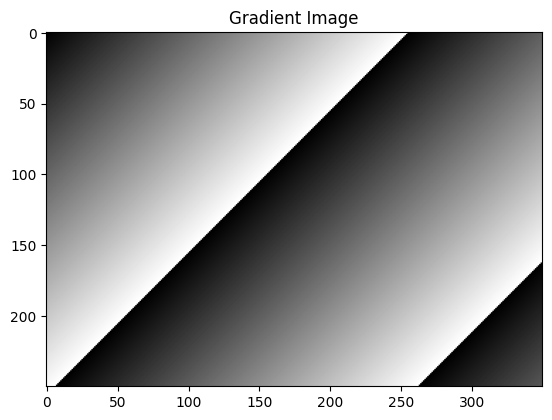

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Read the plain text file
data = np.loadtxt('gradient.txt', dtype=np.uint8)

# Display the image
plt.imshow(data, cmap='gray')
plt.title('Gradient Image')
plt.show()


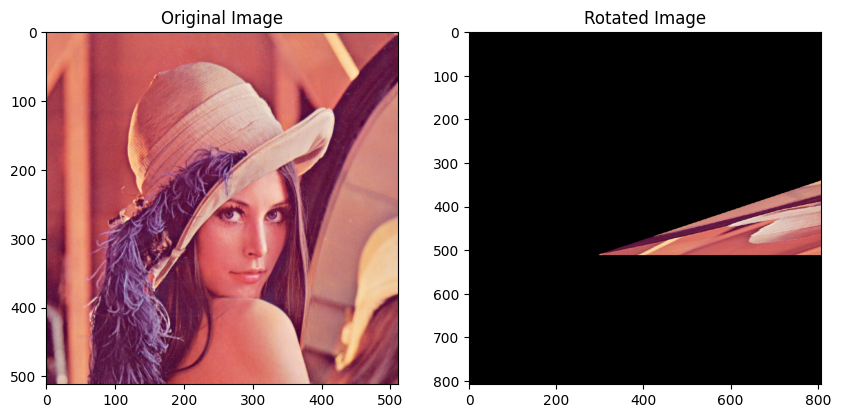

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.ndimage import rotate

def dlr_rotate(image, angle):
    m, n = image.shape[:2]
    alpha = np.radians(angle)
    
    # Calculate the size of the rotated image
    gamma_m = int(np.ceil(n * np.tan(alpha)))
    gamma_n = int(np.ceil(m / np.tan(np.pi/2 - alpha)))
    
    mrt = m + gamma_m
    nrt = n + gamma_n
    
    rotated_image = np.zeros((mrt, nrt, image.shape[2]), dtype=image.dtype)
    
    # Perform the rotation
    for y in range(m):
        for x in range(n):
            new_x = int(nrt - x - (y * np.tan(np.pi / 2 + alpha)))
            new_y = int(m - y * np.tan(alpha))
            
            if 0 <= new_x < nrt and 0 <= new_y < mrt:
                rotated_image[new_y, new_x] = image[y, x]
    
    return rotated_image

# Load and rotate the image
image = plt.imread('./assets/Lenna_test_image.png')
rotated_image = dlr_rotate(image, 30)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_image)
plt.show()


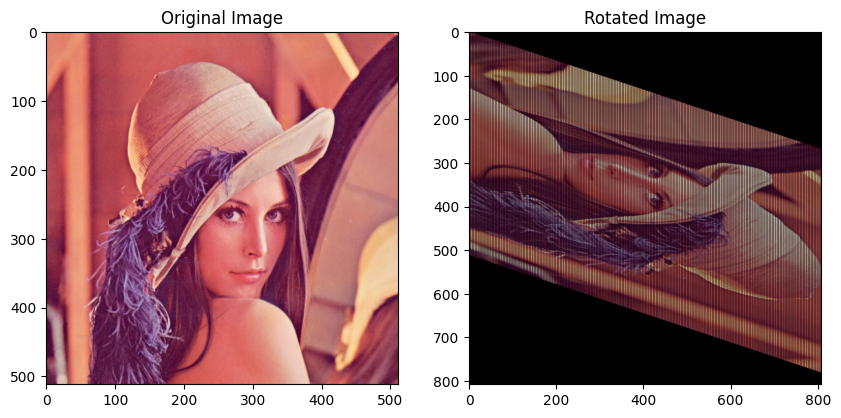

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def dlr_rotate(image, angle):
    m, n = image.shape[:2]
    alpha = np.radians(angle)
    
    if 0 <= angle <= 45:
        # Zone 1
        gamma_m = int(np.ceil(n * np.tan(alpha)))
        gamma_n = int(np.ceil(m / np.tan(np.pi / 2 - alpha)))
        mrt = m + gamma_m
        nrt = n + gamma_n
        
        rotated_image = np.zeros((mrt, nrt, image.shape[2]), dtype=image.dtype)
        
        for y in range(m):
            for x in range(n):
                new_x = int(nrt - x - (y * np.tan(np.pi / 2 + alpha)))
                new_y = int((m - y) * np.tan(alpha))
                
                if 0 <= new_x < nrt and 0 <= new_y < mrt:
                    rotated_image[new_y, new_x] = image[y, x]
    
    elif 45 < angle <= 90:
        # Zone 2
        gamma_m = int(np.ceil(n * np.tan(np.pi / 2 - alpha)))
        gamma_n = int(np.ceil(m / np.tan(alpha)))
        mrt = m + gamma_m
        nrt = n + gamma_n
        
        rotated_image = np.zeros((mrt, nrt, image.shape[2]), dtype=image.dtype)
        
        for y in range(m):
            for x in range(n):
                new_x = int((m - y) * np.tan(alpha))
                new_y = int(nrt - x - (y * np.tan(np.pi / 2 - alpha)))
                
                if 0 <= new_x < nrt and 0 <= new_y < mrt:
                    rotated_image[new_y, new_x] = image[y, x]

    # Add more zones if necessary

    return rotated_image

# Load and rotate the image
image = plt.imread('./assets/Lenna_test_image.png')
rotated_image = dlr_rotate(image, 60)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_image)
plt.show()
